In [ ]:
#Adjacency Matrix
import numpy as np

#Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100



In [ ]:
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] ==1]
      for linking_page in linking_pages:
        new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

for page, rank in enumerate(page_rank):
  print(f"PR(Page {page + 1}) = {rank:.3f}")


PR(Page 1) = 0.122
PR(Page 2) = 0.302
PR(Page 3) = 0.378
PR(Page 4) = 0.198


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

G = nx.DiGraph()

num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

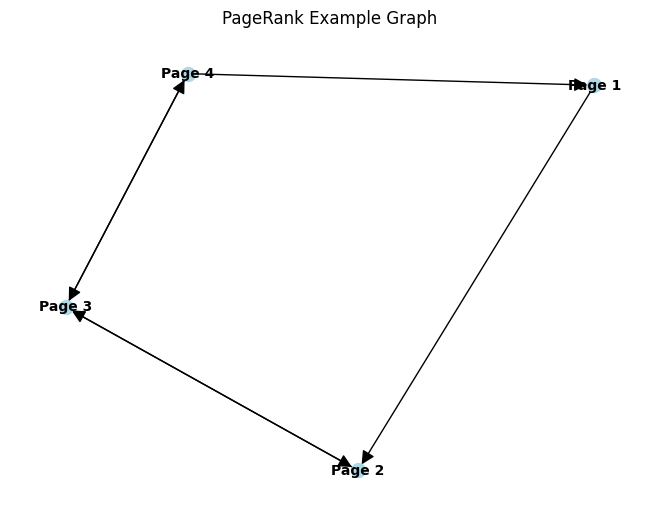

In [ ]:
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

for i in range(num_pages):
  for j in range(num_pages):
    if adjacency_matrix[i, j] == 1:
      G.add_edge(i, j)

pos = nx.spring_layout(G)
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=100, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
myWeb = nx.DiGraph()
myPages = range(1,5)

In [ ]:
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

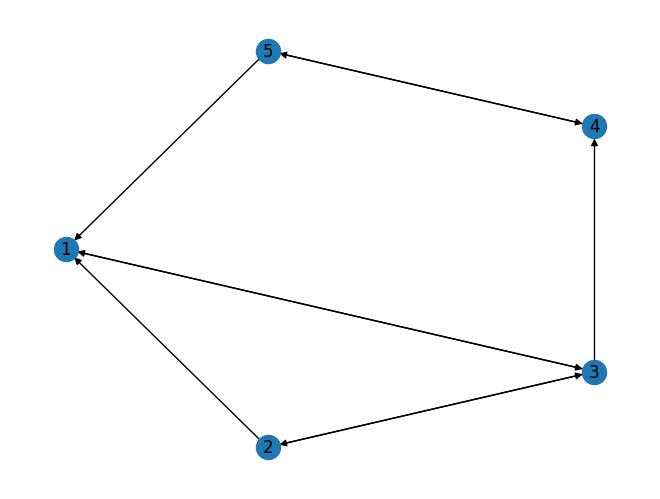

In [ ]:
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [ ]:
from networkx.classes.digraph import DiGraph
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  proob_outwards = np.array(1.0 / outwards)
  G = np.multiply(M, proob_outwards[:, np.newaxis])

  p = np.ones(nodes_set) / float(nodes_set)
  return G, p

myWen = nx.DiGraph
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5,4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         0.         1.         0.         0.        ]
 [0.5        0.         0.5        0.         0.        ]
 [0.33333333 0.33333333 0.         0.33333333 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [1]:
import numpy as np

adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0],
                             [1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 1],
                             [0, 0, 1, 1, 0]])

pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

damping_factor = 0.85

num_iterations = 100



In [2]:
for _ in range(num_iterations):
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      num_outlinks = np.sum(adjacency_matrix[i, :])

      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i])

new_pagerank += (1 - damping_factor) / len(pagerank)

pagerank = new_pagerank
print("Hasil PageRank")
print(pagerank)



Hasil PageRank
[4.28 4.28 4.28 4.28 4.28]


In [3]:
import numpy as np

num_pages = 5

outlinks = np.array([3, 2, 1, 2, 2])
inlinks = np.array([1, 2, 1, 2, 1])
pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

In [6]:
for _ in range(num_iterations):
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += (damping_factor * pagerank[j]) / outlinks[j]

  pagerank = (1 - damping_factor) / num_pages + new_pagerank

  print("Hasil PageRank:")
  for i, pr in enumerate(pagerank):
    print(f"Halaman{chr(ord('A')+i)}:{pr:.4f}")



Hasil PageRank:
HalamanA:0.8644
HalamanB:0.8120
HalamanC:0.7029
HalamanD:0.8120
HalamanE:0.8120
Hasil PageRank:
HalamanA:1.6628
HalamanB:1.5626
HalamanC:1.3102
HalamanD:1.5626
HalamanE:1.5626
Hasil PageRank:
HalamanA:3.1360
HalamanB:2.9430
HalamanC:2.4934
HalamanD:2.9430
HalamanE:2.9430
Hasil PageRank:
HalamanA:5.9018
HalamanB:5.5395
HalamanC:4.6709
HalamanD:5.5395
HalamanE:5.5395
Hasil PageRank:
HalamanA:11.0631
HalamanB:10.3810
HalamanC:8.7650
HalamanD:10.3810
HalamanE:10.3810
Hasil PageRank:
HalamanA:20.7161
HalamanB:19.4387
HalamanC:16.4003
HalamanD:19.4387
HalamanE:19.4387
Hasil PageRank:
HalamanA:38.7546
HalamanB:36.3627
HalamanC:30.6839
HalamanD:36.3627
HalamanE:36.3627
Hasil PageRank:
HalamanA:72.4737
HalamanB:68.0000
HalamanC:57.3729
HalamanD:68.0000
HalamanE:68.0000
Hasil PageRank:
HalamanA:135.4970
HalamanB:127.1312
HalamanC:107.2643
HalamanD:127.1312
HalamanE:127.1312
Hasil PageRank:
HalamanA:253.2970
HalamanB:237.6570
HalamanC:200.5132
HalamanD:237.6570
HalamanE:237.6570
H